In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [139]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_train.csv")

In [140]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [143]:
train.shape

(891, 12)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#std is very high in columns passengerID,age,fare that means data is too spread
# max and 75% percentile gap is more in columns passengerID,age,sibsp,fare that means outliers are present in particular columns 

PassengerId       Axes(0.125,0.712609;0.168478x0.167391)
Survived       Axes(0.327174,0.712609;0.168478x0.167391)
Pclass         Axes(0.529348,0.712609;0.168478x0.167391)
Age            Axes(0.731522,0.712609;0.168478x0.167391)
SibSp             Axes(0.125,0.511739;0.168478x0.167391)
Parch          Axes(0.327174,0.511739;0.168478x0.167391)
Fare           Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

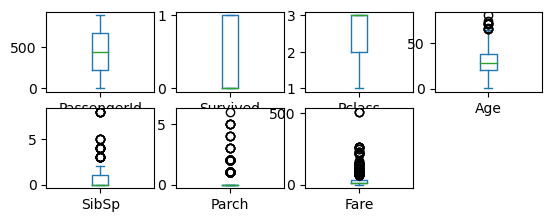

In [147]:
train.plot(kind='box',subplots=True,layout=(4,4))

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le=LabelEncoder()

In [259]:
train['Sex']=le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train["Embarked"])
test['Sex']=le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test["Embarked"])


In [260]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [261]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Visualization 

In [262]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [263]:
train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [264]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [265]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

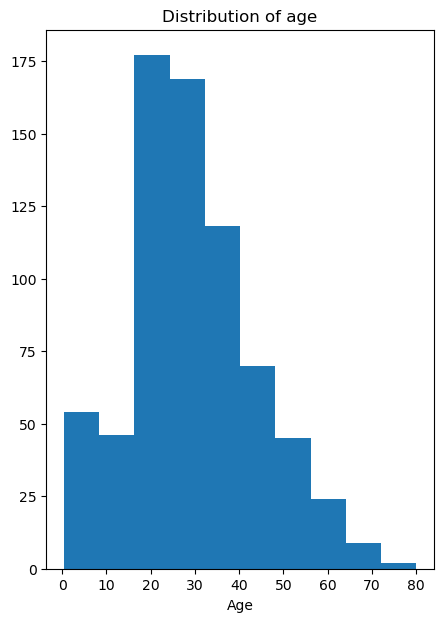

In [266]:
plt.figure(figsize=(5,7))
plt.hist(train['Age'])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.show()

# Categorical Attributes-EDA

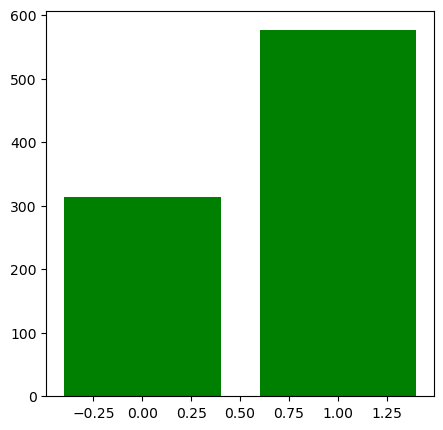

In [267]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Sex'].value_counts().keys()),list(train['Sex'].value_counts()),color="green")
plt.show()

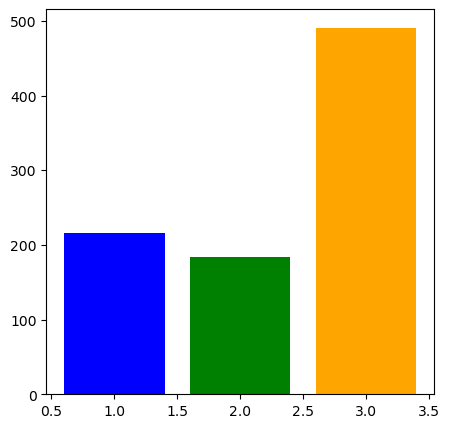

In [268]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Pclass'].value_counts().keys()),list(train['Pclass'].value_counts()),color=["orange","blue","green"])
plt.show()

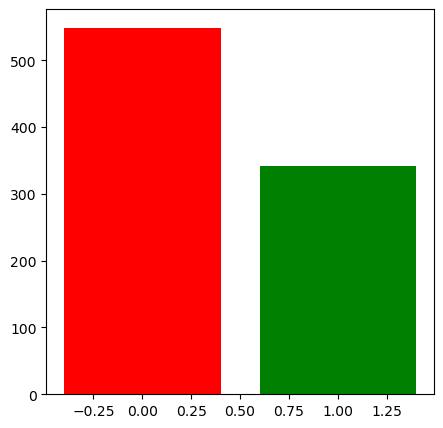

In [269]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Survived'].value_counts().keys()),list(train['Survived'].value_counts()),color=["r","g"])
plt.show()

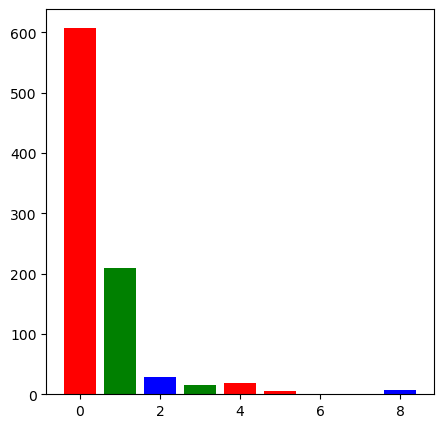

In [270]:
plt.figure(figsize=(5,5))
plt.bar(list(train['SibSp'].value_counts().keys()),list(train['SibSp'].value_counts()),color=["r","g","b"])
plt.show()

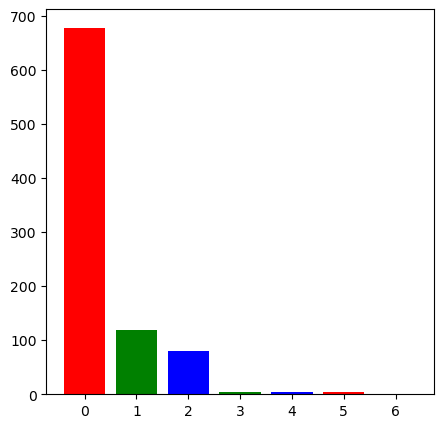

In [271]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Parch'].value_counts().keys()),list(train['Parch'].value_counts()),color=["r","g","b"])
plt.show()

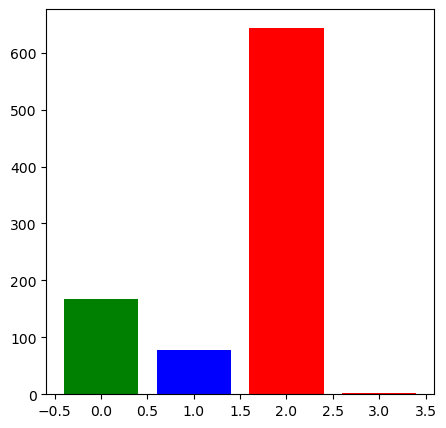

In [272]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Embarked'].value_counts().keys()),list(train['Embarked'].value_counts()),color=["r","g","b"])
plt.show()

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_1160\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

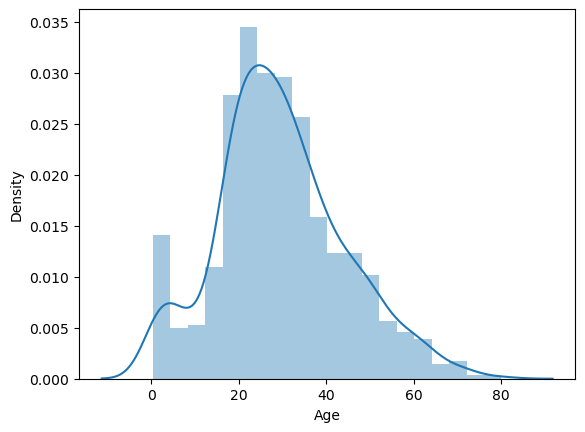

In [273]:
sns.distplot(train['Age'])

# Normally Distributed Data

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_1160\3366235423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

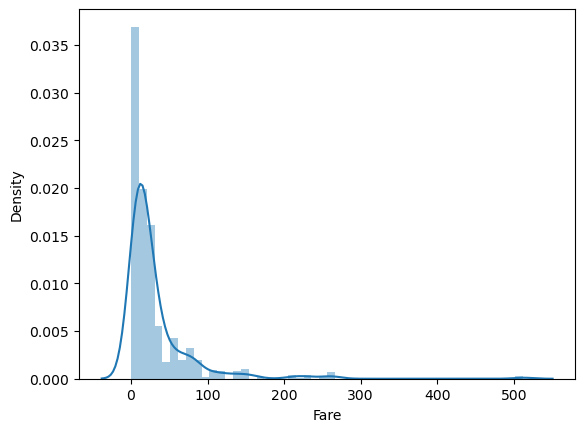

In [274]:
sns.distplot(train["Fare"])

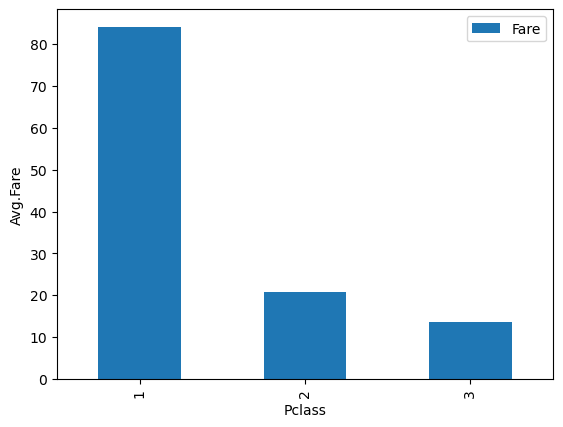

In [275]:
class_fare=train.pivot_table(index="Pclass",values="Fare")
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

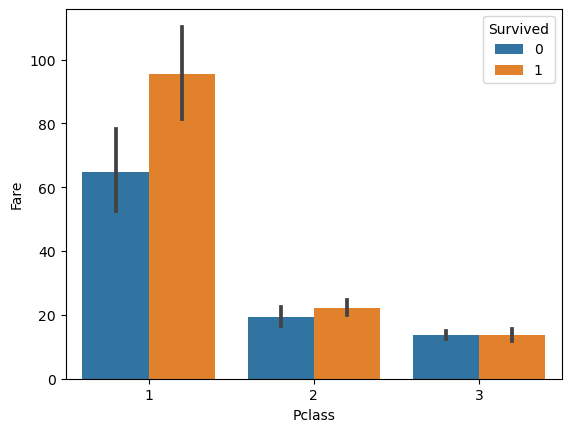

In [276]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

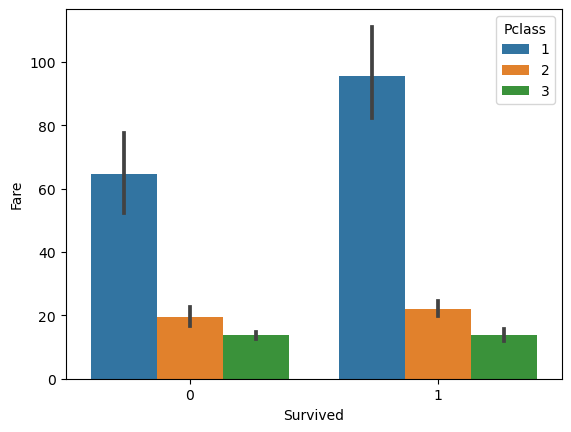

In [277]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')

In [278]:
train.len=len(train)
# combine two dataframes
df=pd.concat([train,test],axis=0)


In [279]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [280]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,1


# find the null values in dataset

In [281]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          0
dtype: int64

# drop the column cabin & Fill the missing values by mean of column

In [282]:
df=df.drop(columns=['Cabin'],axis=1)

In [283]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

In [284]:
df["Age"].mean()

29.69911764705882

In [285]:
df['fare'] =df['Fare'].fillna(df['Fare'].mean())

In [286]:
df['Embarked'].mode([0])

0    2
Name: Embarked, dtype: int64

In [287]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode([0]))

# Log Transformation for uniform Distribution of Data for fare columns

In [288]:
df['Fare']=np.log(df['fare']+1)

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_1160\1092105540.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

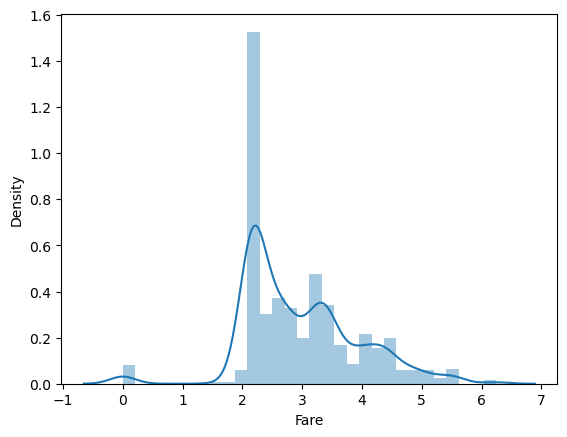

In [289]:
sns.distplot(df["Fare"])

# Correlation MAtrix

C:\Users\AdmiN\AppData\Local\Temp\ipykernel_1160\2675861003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

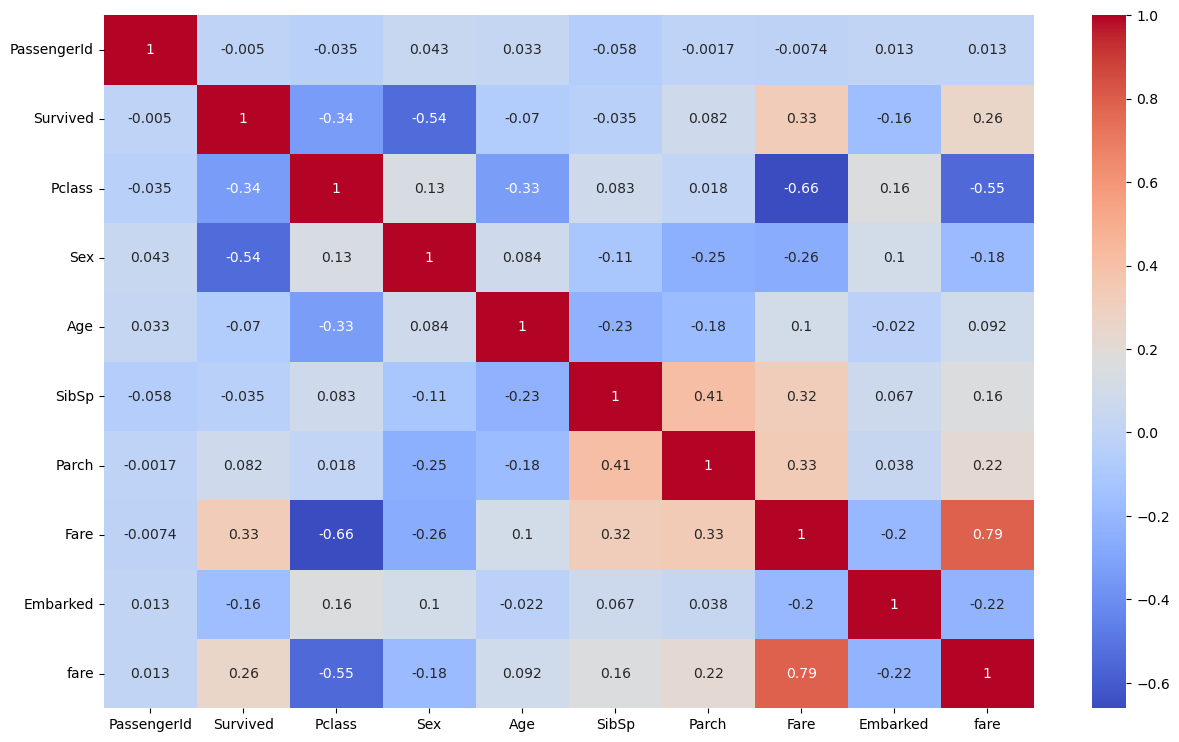

In [290]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# fare is corelated between all attributes 

In [291]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,2,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,2,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,2,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,2,8.0500


# droping unnecessary columns

In [292]:
df=df.drop(columns=['Name','Ticket'],axis=1)

In [293]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare
0,1,0,3,1,22.0,1,0,2.110213,2,7.2500
1,2,1,1,0,38.0,1,0,4.280593,0,71.2833
2,3,1,3,0,26.0,0,0,2.188856,2,7.9250
3,4,1,1,0,35.0,1,0,3.990834,2,53.1000
4,5,0,3,1,35.0,0,0,2.202765,2,8.0500


In [294]:
train['Embarked']=le.fit_transform(train['Embarked'])

In [295]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fare
0,1,0,3,1,22.0,1,0,2.110213,2,7.2500
1,2,1,1,0,38.0,1,0,4.280593,0,71.2833
2,3,1,3,0,26.0,0,0,2.188856,2,7.9250
3,4,1,1,0,35.0,1,0,3.990834,2,53.1000
4,5,0,3,1,35.0,0,0,2.202765,2,8.0500


Now Creatig a model

In [296]:
x=df.iloc[:,0:-3]


In [297]:
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [298]:
y=df.iloc[:,-1]

In [299]:
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 1782, dtype: float64

In [300]:
x.shape

(1782, 7)

In [301]:
y.shape

(1782,)

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [303]:
lm=LinearRegression()

In [304]:
lm

LinearRegression()

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [306]:
x_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
834,835,0,3,1,18.000000,0,0
84,85,1,2,0,17.000000,0,0
607,608,1,1,1,27.000000,0,0
110,111,0,1,1,47.000000,0,0
683,684,0,3,1,14.000000,5,2
...,...,...,...,...,...,...,...
239,240,0,2,1,33.000000,0,0
403,404,0,3,1,28.000000,1,0
860,861,0,3,1,41.000000,2,0
568,569,0,3,1,29.699118,0,0


In [307]:
y_train

834     8.3000
84     10.5000
607    30.5000
110    52.0000
683    46.9000
        ...   
239    12.2750
403    15.8500
860    14.1083
568     7.2292
235     7.5500
Name: fare, Length: 1247, dtype: float64

In [308]:
x_train.shape

(1247, 7)

In [309]:
y_train.shape

(1247,)

In [310]:
x_test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
824,825,0,3,1,2.000000,4,1
580,581,1,2,0,25.000000,1,1
233,234,1,3,0,5.000000,4,2
798,799,0,3,1,30.000000,0,0
777,778,1,3,0,5.000000,0,0
...,...,...,...,...,...,...,...
522,523,0,3,1,29.699118,0,0
513,514,1,1,0,54.000000,1,0
81,82,1,3,1,29.000000,0,0
754,755,1,2,0,48.000000,1,2


In [311]:
x_test.shape

(535, 7)

In [312]:
lm.fit(x_train,y_train)

LinearRegression()

In [313]:
predlm=lm.predict(x_test)

In [314]:
predlm

array([ 3.89821209e+01,  5.86463249e+01,  5.67488149e+01, -1.81414017e-01,
        1.42614748e+01,  6.42525944e+01,  5.68961933e+01,  6.78924567e+01,
       -7.51963671e-01,  1.27779098e+01,  3.51160679e+01,  5.62445689e+01,
        1.48540154e-01,  7.05102853e+01,  3.71910386e+01,  5.88806629e+01,
        1.24087674e+01,  6.00680792e+01,  3.89821209e+01,  3.15973178e+01,
        2.82178384e+01,  7.90779538e+01, -5.27008532e-01,  1.67454525e+01,
        2.25124253e+01,  6.82695480e+01,  7.76077288e+01,  9.53063727e+00,
        6.48501849e+01, -7.33963957e-01,  8.04667536e+01,  2.77408460e+01,
        1.22638520e+00,  6.18013354e+01,  3.59292663e+01,  5.40967227e+01,
        7.29012341e+01,  1.90301277e+01,  3.40469503e+01,  6.70432061e+01,
        3.35010814e+01,  5.40967227e+01,  6.32249028e+01,  4.90078931e+01,
        2.71945744e+01,  2.01893093e+01,  3.68436498e+01, -3.13988588e+00,
        8.69204403e-01, -1.51695153e+00,  3.09952996e+01,  3.18434240e+01,
       -6.79557485e-01,  

In [315]:
lm.intercept_

106.49550384792587

In [316]:
lm.coef_

array([ 1.79997143e-03,  5.17752039e+00, -3.26678764e+01, -5.26167807e+00,
       -1.61659591e-01,  6.42850243e+00,  8.87625744e+00])

In [317]:
lm.score(x_train,y_train)

0.36501767899978654

#Accuracy is too Low

In [326]:
from sklearn.tree import DecisionTreeClassifier

In [327]:
dtc=DecisionTreeClassifier()

In [328]:
dtc

DecisionTreeClassifier()

In [329]:
dtc.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'